## Observations and Insights 

# Pramod Philip

In [2]:
#Observations
#1. Mice on the Capomulin and Ramicane drug regimens saw the 2
# lowest mean and median tumor volumes. They were also the only two
# drug regimens that featured mean tumor volumes below the average mean 
# tumor volume for all drug regimens at 50.98 mm^3. 
#2. By observing the Drug Regimen Final Tumor Volume box plot,
# it can be inferred that the drug regimen Infubinol featured the 
# largest range  for final tumor volumes among the four drug regimens 
# listed. However, its interquartile range is the same size as that of 
# Ceftamin which features an interquartile range of roughly 25 mm^3.
#3. The Average Tumor Volume by Weight for Capomulin scatter plot had a 
# clear positive trend with the linear regression model matching this.
# There were two tumor volumes farther below the linear regression line,
# and both belonged to mice with weights of 17 g each. 
#4. According to the Drug Regimen Frequency bar graphs,
# the two most frequented drug regimens were were Capomulin and Ramicane
# with 230 and 228 measurements taken respectively.

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = mouse_metadata.merge(study_results).sort_values('Tumor Volume (mm3)')

# Display the data table for preview
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
...,...,...,...,...,...,...,...,...
1571,t724,Naftisol,Female,2,25,45,75.113288,2
1179,m269,Stelasyn,Female,22,28,45,75.123690,1
1354,p189,Ketapril,Male,8,28,45,75.294936,4
1152,l725,Naftisol,Female,8,26,45,76.668817,3


In [3]:
# Checking the number of mice.
mouse_count = mouse_df['Mouse ID'].count()
mouse_count

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupli_mice = mouse_df.duplicated(['Mouse ID'],keep='first')
dupli_mice = mouse_df[dupli_mice]
dupli_time = dupli_mice.duplicated(['Timepoint'],keep = 'last')
dupli_mice_2 = dupli_mice[dupli_time]
dupli_mice_2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
...,...,...,...,...,...,...,...,...
567,a818,Naftisol,Female,12,28,45,74.997764,2
1571,t724,Naftisol,Female,2,25,45,75.113288,2
1179,m269,Stelasyn,Female,22,28,45,75.123690,1
1354,p189,Ketapril,Male,8,28,45,75.294936,4


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_id = mouse_df.duplicated(['Mouse ID'],keep='last')
dupli_mice_2 = mouse_df[dup_id]
dupli_mice_2 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
...,...,...,...,...,...,...,...,...
929,h246,Ketapril,Male,13,30,40,71.150835,2
1289,o562,Propriva,Female,4,25,40,71.172463,1
1276,o331,Ketapril,Male,24,30,40,71.447743,3
1151,l725,Naftisol,Female,8,26,40,73.693494,3


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df_2 = mouse_df.drop_duplicates(['Mouse ID','Timepoint'],keep='first')
mouse_df_2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
...,...,...,...,...,...,...,...,...
1571,t724,Naftisol,Female,2,25,45,75.113288,2
1179,m269,Stelasyn,Female,22,28,45,75.123690,1
1354,p189,Ketapril,Male,8,28,45,75.294936,4
1152,l725,Naftisol,Female,8,26,45,76.668817,3


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_count = mouse_df_2['Mouse ID'].count()
mouse_count

1888

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mouse_mean = pd.DataFrame(mouse_df_2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean())
mouse_median = pd.DataFrame(mouse_df_2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median())
mouse_var = pd.DataFrame(mouse_df_2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var())
mouse_sd = pd.DataFrame(mouse_df_2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std())
mouse_sem = pd.DataFrame(mouse_df_2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem())
# Assemble the resulting series into a single summary dataframe.
mouse_stat = pd.concat([mouse_mean,mouse_median,mouse_var,mouse_sd,mouse_sem],axis=1)
mouse_stat = mouse_stat.set_axis(['Tumor Volume Mean','Tumor Volume Median','Tumor Volume Variance',
                                 'Tumor Volume Standard Deviation','Tumor Volume Standard Error of Mean'], axis=1)
mouse_stat

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.369428,50.783528,43.219994,6.574191,0.526357
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_stat
# Using the aggregation method, produce the same summary statistics in a single line
agg_mouse = mouse_df_2.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean',
                                                                           'median',
                                                                           'var',
                                                                           'std',
                                                                           'sem']})
agg_mouse

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.369428  50.783528  43.219994  6.574191  0.526357
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     156
Name: Drug Regimen, dtype: int64

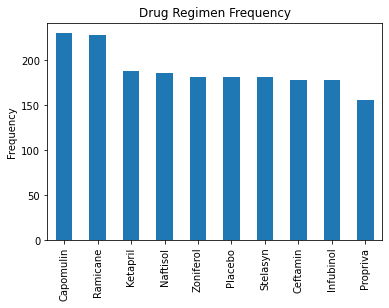

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_count = mouse_df_2['Drug Regimen'].value_counts()
drug_regimen = drug_count.plot(kind='bar',title='Drug Regimen Frequency')
drug_regimen.set_ylabel('Frequency')

drug_count

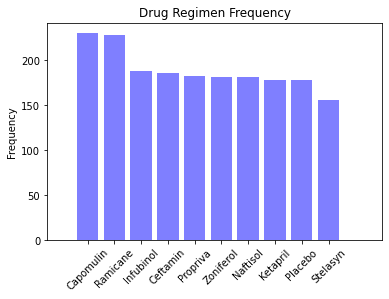

In [26]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_names = mouse_df_2['Drug Regimen'].unique()
drug_names[0] = 'Capomulin'
drug_names[1] = 'Ramicane'
drug_count = mouse_df_2['Drug Regimen'].value_counts()
x_axis = np.arange(len(drug_count))
plt.bar(x_axis,drug_count, color = 'blue', alpha=0.5, align='center')

ticks = [v for v in x_axis]
plt.xticks(ticks, drug_names,rotation = 45)
plt.ylabel('Frequency')
plt.title('Drug Regimen Frequency')
plt.xlim(-1.5,len(x_axis)+1)
plt.show()

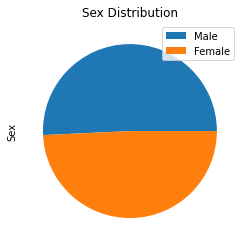

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gen = mouse_df_2['Sex'].value_counts()
mouse_gen_pie = mouse_gen.plot.pie(title='Sex Distribution',legend=True,textprops={'color':'w','size':20})

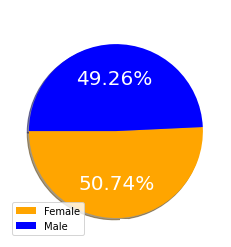

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female','Male']
sizes = mouse_gen
colors = ['orange','blue']

plt.pie(sizes,labels=labels,colors=colors,shadow=True,startangle=180,
        autopct="%1.2f%%",textprops={'color':"w", 'size':20})
plt.title('Sex Distribution',fontdict={'color':'white'})
plt.legend(labels,loc=3)
plt.show()

## Quartiles, Outliers and Boxplots

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
capomulin = mouse_df_2.loc[mouse_df['Drug Regimen'] == 'Capomulin']
ramicane = mouse_df_2.loc[mouse_df['Drug Regimen'] == 'Ramicane']
infubinol = mouse_df_2.loc[mouse_df['Drug Regimen'] == 'Infubinol']
ceftamin = mouse_df_2.loc[mouse_df['Drug Regimen'] == 'Ceftamin']
four_regi = pd.concat([capomulin,ramicane,infubinol,ceftamin],axis=0)
four_regi = four_regi.set_index('Mouse ID')
new_four_regi = four_regi.groupby(['Drug Regimen','Mouse ID']).agg({'Timepoint':['max']})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_regi = pd.merge(four_regi,new_four_regi,on='Mouse ID')
new_regi.rename(columns={('Timepoint','max'):'Timepoint Max'}, inplace=True)
new_regi = new_regi.loc[new_regi['Timepoint']==new_regi[('Timepoint Max')]]

new_regi

/Users/pramodphilip/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Timepoint Max
Mouse ID,,,,,,,,
s185,Capomulin,Female,3,17,45,23.343598,1,45
x401,Capomulin,Female,16,15,45,28.484033,0,45
m601,Capomulin,Male,22,17,45,28.430964,1,45
f966,Capomulin,Male,16,17,20,30.485985,0,20
u364,Capomulin,Male,18,17,45,31.023923,3,45
...,...,...,...,...,...,...,...,...
b447,Ceftamin,Male,2,30,0,45.000000,0,0
o287,Ceftamin,Male,2,28,45,59.741901,4,45
q483,Ceftamin,Male,6,26,40,64.192341,1,40


In [44]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
upper_regi = new_regi['Tumor Volume (mm3)'].quantile(0.75)
lower_regi = new_regi['Tumor Volume (mm3)'].quantile(0.25)
iqr_regi = upper_regi - lower_regi

# Determine outliers using upper and lower bounds
up_bound = upper_regi + (1.5*iqr_regi)
low_bound = lower_regi - (1.5*iqr_regi)

#No values above or below bounds
new_regi[(new_regi['Tumor Volume (mm3)']<low_bound)|(new_regi['Tumor Volume (mm3)']>up_bound)]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Timepoint Max
Mouse ID,,,,,,,,


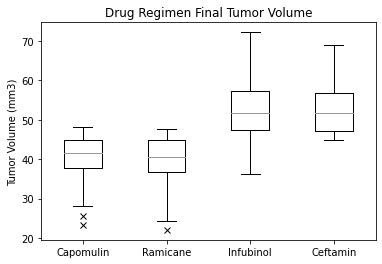

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capomulin = mouse_df_2.loc[mouse_df_2['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane = mouse_df_2.loc[mouse_df_2['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol = mouse_df_2.loc[mouse_df_2['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin = mouse_df_2.loc[mouse_df_2['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']
drug_regis = ['Capomulin','Ramicane','Infubinol','Ceftamin']
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=drug_regis,flierprops={'marker':'x'})
plt.title('Drug Regimen Final Tumor Volume')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

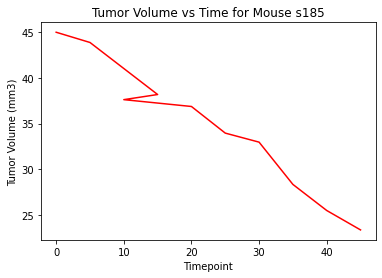

In [33]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_mouse = mouse_df_2.loc[mouse_df['Mouse ID'] == 's185']
plt.plot(capo_mouse['Timepoint'],capo_mouse['Tumor Volume (mm3)'],color = 'red')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Time for Mouse s185')
plt.show()

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
i557    24.0
i738    20.0
j119    23.0
j246    21.0
l509    21.0
l897    19.0
m601    17.0
m957    19.0
r157    25.0
r554    17.0
r944    25.0
s185    17.0
s710    23.0
t565    17.0
u364    17.0
v923    21.0
w150    23.0
w914    21.0
x401    15.0
y793    17.0
Name: Weight (g), dtype: float64

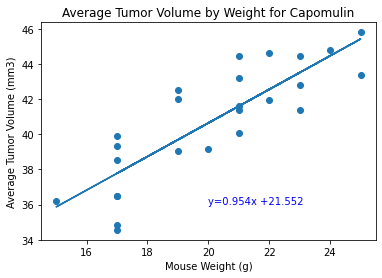

In [46]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_mice = mouse_df_2.loc[mouse_df_2['Drug Regimen'] == 'Capomulin']
avg_tum = capo_mice.groupby(['Mouse ID']).mean()
avg_tum.rename(columns={'Tumor Volume (mm3)':'Average Tumor Volume (mm3)'}, inplace=True)

plt.scatter(avg_tum['Weight (g)'],avg_tum['Average Tumor Volume (mm3)'])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Weight for Capomulin')

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(avg_tum['Weight (g)'],avg_tum['Average Tumor Volume (mm3)'])
tum_regress_line = avg_tum['Weight (g)']*slope + intercept

equation = 'y=' + str(round(slope,3))+"x +" + str(round(intercept,3))
plt.plot(avg_tum['Weight (g)'],tum_regress_line)
plt.annotate(equation,(20,36),fontsize=10,color='blue')

avg_tum['Weight (g)']

## Correlation and Regression